# Distribution of Compustat observations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrds

### Connect WRDS

In [3]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


------

### Download funda from Compustat

In [4]:
df= conn.raw_sql(f"""select conm, gvkey, fyear, at, sale, ni, sich
                    from comp.funda a
                    where a.fyear >= 1990 and 
                        a.fyear <= 2020 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C'
                    """)
print(df.shape)

(352623, 7)


In [5]:
df=df.dropna()
df= df.sort_values(['gvkey','fyear'])
df['fyear']= df['fyear'].astype(int)
df= df.reset_index(drop=True)
print(df.shape)
df.head()

(252762, 7)


,conm,gvkey,fyear,at,sale,ni,sich
0,AAR CORP,001004,1990,379.958,466.542,14.801,5080.0
1,AAR CORP,001004,1991,395.351,422.657,10.020,5080.0
2,AAR CORP,001004,1992,365.151,382.780,0.283,5080.0
3,AAR CORP,001004,1993,417.626,407.754,9.494,5080.0
4,AAR CORP,001004,1994,425.814,451.395,10.463,5080.0


In [6]:
# excluding financial firms
df= df[~( (df.sich>=6000)&(df.sich<7000) )]
df.shape

(210233, 7)

In [7]:
df['neg_ni']= (df.ni <= 0).astype(int)
df.head()

,conm,gvkey,fyear,at,sale,ni,sich,neg_ni
0,AAR CORP,001004,1990,379.958,466.542,14.801,5080.0,0
1,AAR CORP,001004,1991,395.351,422.657,10.020,5080.0,0
2,AAR CORP,001004,1992,365.151,382.780,0.283,5080.0,0
3,AAR CORP,001004,1993,417.626,407.754,9.494,5080.0,0
4,AAR CORP,001004,1994,425.814,451.395,10.463,5080.0,0


------

### Aggregate data to year-level

In [8]:
yearly_loss= df.groupby('fyear').agg({
                            'gvkey':'count',
                            'neg_ni':('mean')
                            }).reset_index()
yearly_loss.rename(columns={'gvkey':'count'}, inplace= True)
yearly_loss= yearly_loss[yearly_loss.fyear>= 1990]
yearly_loss.head()

,fyear,count,neg_ni
0,1990,6588,0.390710
1,1991,6700,0.405672
2,1992,7071,0.385377
3,1993,7512,0.371805
4,1994,7982,0.338386


--------------------------------------
## Visualization after aggregation

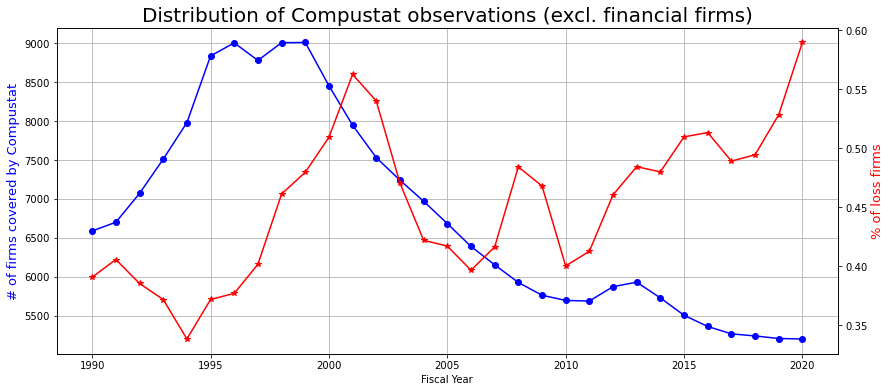

In [11]:
fig, ax1 = plt.subplots(figsize= (14,6))
ax2 = ax1.twinx()
ax1.plot(yearly_loss['fyear'], yearly_loss['count'], marker= 'o', color='b', label= 'Compustat obs #')
ax2.plot(yearly_loss['fyear'], yearly_loss['neg_ni'], marker= '*', color='r', label= 'loss firm %')
ax1.set_title('Distribution of Compustat observations (excl. financial firms)', fontsize= 20)
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('# of firms covered by Compustat', color='b', fontsize= 13)
ax2.set_ylabel('% of loss firms', color='r', fontsize= 13)
ax1.grid()
plt.show()

--------------